In [438]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [439]:
#
data = pd.read_csv("FIFA 2018 Statistics.csv")

In [440]:
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [441]:
data['Opponent'].head()

0    Saudi Arabia
1          Russia
2         Uruguay
3           Egypt
4            Iran
Name: Opponent, dtype: object

In [442]:
teams = data['Team']

In [443]:
teams.head()

0          Russia
1    Saudi Arabia
2           Egypt
3         Uruguay
4         Morocco
Name: Team, dtype: object

In [444]:
teams[0]

'Russia'

In [445]:
croatiaFinals = data.iloc[127]

In [446]:
croatiaFinals

Date                      15-07-2018
Team                         Croatia
Opponent                      France
Goal Scored                        2
Ball Possession %                 61
Attempts                          15
On-Target                          3
Off-Target                         8
Blocked                            4
Corners                            6
Offsides                           1
Free Kicks                        15
Saves                              3
Pass Accuracy %                   83
Passes                           547
Distance Covered (Kms)           100
Fouls Committed                   13
Yellow Card                        1
Yellow & Red                       0
Red                                0
Man of the Match                  No
1st Goal                          28
Round                          Final
PSO                               No
Goals in PSO                       0
Own goals                        NaN
Own goal Time                    NaN
N

In [447]:
#what?! Own goals = 0? Mandzukic scored an own goal lmao

# *Data Cleaning*




In [448]:
list(data)

['Date',
 'Team',
 'Opponent',
 'Goal Scored',
 'Ball Possession %',
 'Attempts',
 'On-Target',
 'Off-Target',
 'Blocked',
 'Corners',
 'Offsides',
 'Free Kicks',
 'Saves',
 'Pass Accuracy %',
 'Passes',
 'Distance Covered (Kms)',
 'Fouls Committed',
 'Yellow Card',
 'Yellow & Red',
 'Red',
 'Man of the Match',
 '1st Goal',
 'Round',
 'PSO',
 'Goals in PSO',
 'Own goals',
 'Own goal Time']

In [449]:
data.drop('Date', inplace=True,axis=1)

In [450]:
data.head()

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,Egypt,Uruguay,0,43,8,3,3,2,0,1,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,Uruguay,Egypt,1,57,14,4,6,4,5,1,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,Morocco,Iran,0,64,13,3,6,4,5,0,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


### Set NaN to None

In [451]:
data = data.astype(object).where(pd.notnull(data), str)

In [452]:
data.head()

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,...,0,0,0,Yes,12,Group Stage,No,0,Team Opponent Goal Score...,Team Opponent Goal Score...
1,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,...,0,0,0,No,Team Opponent Goal Score...,Group Stage,No,0,Team Opponent Goal Score...,Team Opponent Goal Score...
2,Egypt,Uruguay,0,43,8,3,3,2,0,1,...,2,0,0,No,Team Opponent Goal Score...,Group Stage,No,0,Team Opponent Goal Score...,Team Opponent Goal Score...
3,Uruguay,Egypt,1,57,14,4,6,4,5,1,...,0,0,0,Yes,89,Group Stage,No,0,Team Opponent Goal Score...,Team Opponent Goal Score...
4,Morocco,Iran,0,64,13,3,6,4,5,0,...,1,0,0,No,Team Opponent Goal Score...,Group Stage,No,0,1,90


In [453]:
#drop rows with incomplete data. Aggressive thing to do, but lets do it
data = data.dropna(how='all')

##### Check dtype of the columns

In [454]:
data.dtypes

Team                      object
Opponent                  object
Goal Scored               object
Ball Possession %         object
Attempts                  object
On-Target                 object
Off-Target                object
Blocked                   object
Corners                   object
Offsides                  object
Free Kicks                object
Saves                     object
Pass Accuracy %           object
Passes                    object
Distance Covered (Kms)    object
Fouls Committed           object
Yellow Card               object
Yellow & Red              object
Red                       object
Man of the Match          object
1st Goal                  object
Round                     object
PSO                       object
Goals in PSO              object
Own goals                 object
Own goal Time             object
dtype: object

In [455]:
data.iloc[2]['Goal Scored']

0

In [456]:
isinstance(data.iloc[2]['Goal Scored'], int)

True

In [457]:
isinstance(data.iloc[3]['Opponent'], str)

True

# Visualization

In [458]:
data['Goal Scored'].head()

0    5
1    0
2    0
3    1
4    0
Name: Goal Scored, dtype: object

In [459]:
goal_scored = data['Goal Scored']

In [460]:
attempts = data['Attempts']

In [461]:
attempts.head()

0    13
1     6
2     8
3    14
4    13
Name: Attempts, dtype: object

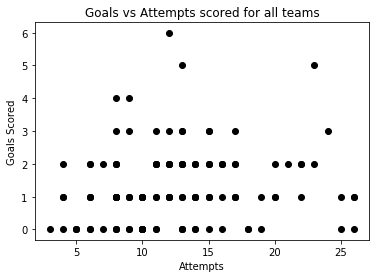

In [462]:
plt.title("Goals vs Attempts scored for all teams")
plt.xlabel("Attempts")
plt.ylabel("Goals Scored")
plt.scatter(attempts, goal_scored, color=['black'])

#### Goals vs Possession for Croatia 

In [463]:
croatiaData = data[data['Team'].str.contains('Croatia')]

In [464]:
croatiaData

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
14,Croatia,Nigeria,2,54,11,2,7,2,6,2,...,2,0,0,Yes,32,Group Stage,No,0,Team Opponent Goal Score...,Team Opponent Goal Score...
45,Croatia,Argentina,3,42,15,5,6,4,2,3,...,4,0,0,Yes,53,Group Stage,No,0,Team Opponent Goal Score...,Team Opponent Goal Score...
79,Croatia,Iceland,2,59,13,2,8,3,5,0,...,2,0,0,No,53,Group Stage,No,0,Team Opponent Goal Score...,Team Opponent Goal Score...
102,Croatia,Denmark,1,54,22,7,8,7,5,2,...,0,0,0,Yes,4,Round of 16,Yes,3,Team Opponent Goal Score...,Team Opponent Goal Score...
119,Croatia,Russia,2,62,17,3,10,4,8,0,...,4,0,0,Yes,39,Quarter Finals,Yes,4,Team Opponent Goal Score...,Team Opponent Goal Score...
122,Croatia,England,2,54,22,7,11,4,8,1,...,2,0,0,Yes,68,Semi- Finals,No,0,Team Opponent Goal Score...,Team Opponent Goal Score...
127,Croatia,France,2,61,15,3,8,4,6,1,...,1,0,0,No,28,Final,No,0,Team Opponent Goal Score...,Team Opponent Goal Score...


In [465]:
goals_by_croats = croatiaData['Goal Scored']
goals_by_croats

14     2
45     3
79     2
102    1
119    2
122    2
127    2
Name: Goal Scored, dtype: object

In [466]:
possession_by_croats = croatiaData['Ball Possession %']

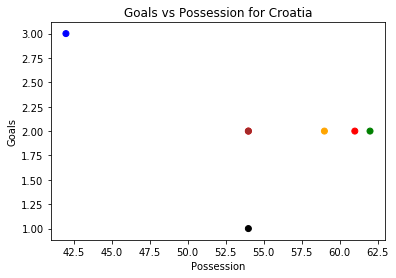

In [467]:
plt.title('Goals vs Possession for Croatia')
plt.xlabel('Possession')
plt.ylabel('Goals')
plt.scatter(possession_by_croats, goals_by_croats, color=['red', 'blue', 'orange', 'black', 'green', 'brown'])

In [468]:
v_arg = croatiaData[croatiaData['Opponent'].str.contains('Argentina')]
v_france = croatiaData[croatiaData['Opponent'].str.contains('France')]

In [469]:
v_arg
goals = np.array(data['Goal Scored'])
goals

array([5, 0, 0, 1, 0, 1, 3, 3, 2, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 3, 0, 1, 2, 1, 2, 1, 2, 3, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 3,
       2, 0, 2, 0, 1, 2, 5, 2, 1, 2, 2, 1, 6, 1, 2, 2, 0, 3, 3, 0, 2, 1, 2,
       2, 1, 1, 0, 0, 0, 2, 1, 2, 1, 2, 2, 0, 0, 3, 0, 2, 2, 2, 0, 1, 0, 1,
       1, 2, 0, 1, 4, 3, 2, 1, 1, 1, 1, 1, 2, 0, 3, 2, 1, 0, 1, 1, 0, 2, 1,
       2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 0, 4, 2], dtype=object)

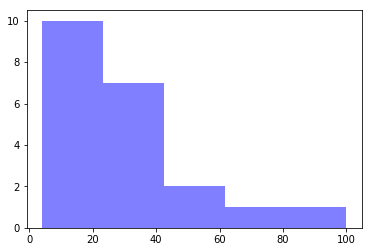

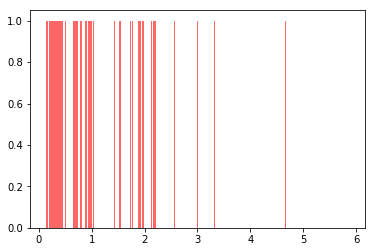

In [470]:
###EXAMPLE OF HISTOGRAM FOR REFERENCE PURPOSES

x = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]
num_bins = 5
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

#Needs to be properly presented
plt.hist(goals, bins=5, facecolor='red', alpha=0.6)
plt.show()

In [471]:
leg = croatiaData.iloc[:]['Opponent']

In [472]:
tar = croatiaData['On-Target']

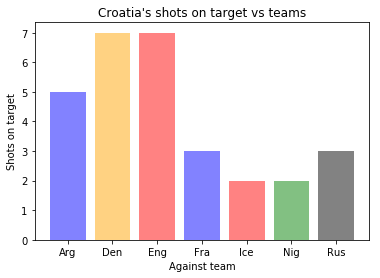

In [473]:
plt.bar(['Nig', 'Arg', 'Ice', 'Den', 'Rus', 'Eng', "Fra"], tar, alpha=0.49, color=['green', 'blue', 'red', 'orange', 'black', 'red', 'blue'])
plt.xlabel("Against team")
plt.ylabel('Shots on target')
plt.title('Croatia\'s shots on target vs teams')
plt.show()

In [482]:
dataC = data.columns
newData = data
dataC

Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red',
       'Goals in PSO'],
      dtype='object')